# Tarea1: Juan Luis Baldelomar Cabrera

<h2> link de datos </h2>

<a href="https://drive.google.com/file/d/1LLQ872UvM55O0fGfLvTUn5EdX_BlOiof/view?usp=sharing">LINK DATOS</a>

In [31]:
import re
import glob
import nltk 

In [25]:
filenames = glob.glob('conferencias_fecha/*')
print('number of documents: ', len(filenames))

number of documents:  759


# 2. Vistazo a los Datos

<h3> 1. carga de datos a un solo string y obtener tokens </h3>

In [4]:
conf_str = ""
for filename in filenames:
    file = open(filename, 'r')
    conf_str += file.read()

In [125]:
print('cantidad de caracteres: ', len(conf_str))

cantidad de caracteres:  47969144


<h4> Obtener Tokens </h4>

Para ello utilizamos la función split, pero primero dividimos el string de archivos en líneas para no considerar los saltos de línea ('\n') y luego dividimos por espacios

In [44]:
# get lines
lines = conf_str.split('\n')
tokens = []
for line in lines:
    # get tokens in each line
    tokens += line.split(' ')

<h3> 2. Contar cantidad de Tokens </h3>

In [120]:
print('number of tokens: ', len(tokens))

number of tokens:  8153637


<h3> 3. Obtener Vocabulario (mostrar algunos tokens) y Mostrar su Longitud </h3>

In [46]:
unique_tokens = list(set(tokens))
print("number of unique tokens: ", len(unique_tokens))

number of unique tokens:  175357


In [24]:
unique_tokens[:10] + unique_tokens[-10: ]

['',
 'recibí,',
 'pieza-',
 'autoricé?',
 'Vivó,',
 'Twitter-',
 'linchamiento?,',
 'sellado.',
 'leen?',
 'citaron',
 'Norteamérica?,',
 'Chevron?',
 'amasan',
 'actuarían',
 'deterioro.',
 'gobernabilidad',
 'jovencitas',
 'apóyenos,',
 'teóricas.',
 'diseñador']

<h3> 4. Riqueza de Vocabulario </h3>

In [47]:
quot = len(tokens)/len(unique_tokens)
print('riqueza de vocabulario: ', quot)

riqueza :  46.49735682065729


<h3> 5. Pasos 1, 2, 3 y 4 con texto en minúsculas </h3>

Podemos observar que la cantidad de palabras diferentes disminuye, lo cual tiene sentido porque ahora palabras que tienen las mismas letras pero en mayúsculas o minúsculas no hacen diferencia porque todas fueron convertidas a minúsculas. También podemos observar que el cociente entre la cantidad total de palabras y las palabras distintas aumenta, pues siguen existiendo la misma cantidad de palabras, pero la cantidad de palabras diferentes disminuyó. 

In [115]:
lower_str = conf_str.lower()

In [116]:
# get lines
lines = lower_str.split('\n')
tokens = []
for line in lines:
    # get tokens in each line
    tokens += line.split(' ')

# length of vocabulary
print("number of tokens: ", len(tokens))

# unique tokens and length
unique_tokens = list(set(tokens))
print("number of unique tokens: ", len(unique_tokens))

# riqueza
quot = len(tokens)/len(unique_tokens)
print('riqueza de vocabulario: ', quot)

number of tokens:  8153637
number of unique tokens:  161993
riqueza de vocabulario:  50.33326748686672


<h3> 6. RegExp de NLTK </h3>

In [122]:
from nltk.tokenize import RegexpTokenizer

In [91]:
tokenizer = RegexpTokenizer('[a-zA-Zá-úÁ-Ú]+')
tokens = tokenizer.tokenize(conf_str)
print('number of tokens: ', len(tokens))

unique_tokens = list(set(tokens))
print("number of unique tokens: ", len(unique_tokens))

number of tokens:  7902141
number of unique tokens:  76169


**Carga de Tokens a un objeto Text() de nltk**

In [92]:
nltk_tokens = nltk.Text(tokens)

<h3> 7. TweetTokenizer </h3>

En esta sección utilizamos el tokenizador de Tweets de NLTK. Podemos ver que en efecto la cantidad de tokens es mayor que en el ejercicio anterior, debido a que se reconocen más tokens que solo palabras con mayúsculas y minúsculas. Sin embargo, la cantidad de tokens diferentes es menor, y esto se debe a que el texto en este ejercicio es primero convertido a minúsculas, y en el ejercicio anterior este paso no se realizó.

In [6]:
from nltk.tokenize import TweetTokenizer

# lower string
lower_str = conf_str.lower()
  
# Create a reference variable for Class TweetTokenizer
tk = TweetTokenizer()
  
# Use tokenize method
tokens = tk.tokenize(lower_str)
print('number of tokens: ', len(tokens))

unique_tokens = list(set(tokens))
print("number of unique tokens: ", len(unique_tokens))

number of tokens:  9234756
number of unique tokens:  71646


**Carga de Tokens a un objeto Text() de nltk**

In [8]:
text_tokens = nltk.Text(tokens)

<h4> Si ahora convertimos el texto a minúsculas y utilizamos el tokenizador del ejercicio anterior, podemos ver que en efecto la cantidad de tokens diferentes es menor que utilizando el TweetTokenizer </h4>

In [124]:
tokenizer = RegexpTokenizer('[a-zA-Zá-úÁ-Ú]+')
tokens = tokenizer.tokenize(conf_str.lower())
unique_tokens = list(set(tokens))
print("number of unique tokens: ", len(unique_tokens))

number of unique tokens:  66353


# 3. Functiones NLTK

<h3>1. Función Concordance </h3>
Buscaremos los contextos de palabras relacionadas a problemas que han sido comunes o se han escuchado en esta administración. 
Las palabras son:

1. corrupción
2. huachicoleo
3. aeropuerto
4. pobre
5. democracia

In [17]:
text_tokens.concordance('corrupción')

Displaying 25 of 6659 matches:
permite ni se permitirán actos de corrupción . es cuanto , presidente . santia
presume la existencia de actos de corrupción al venderlas a sobreprecio al gob
argados de vigilar de que no haya corrupción al interior del poder judicial y 
para investigar posibles casos de corrupción . y ya lo tercero es lo que pueda
sexenio que sorprende por su gran corrupción y opacidad . y , presidente , ¿ s
uviese o continuara el régimen de corrupción que imperaba , el régimen de priv
do esto por los negocios , por la corrupción , no les importaba extraer el gas
aldó , porque hay que combatir la corrupción , hay que acabar con todas estas 
e defienden el antiguo régimen de corrupción ? en los medios , y eso no en tod
do en chihuahua para desterrar la corrupción y la impunidad , así como para co
ción , es el combate frontal a la corrupción y a la impunidad . ustedes escuch
mprendimos en chihuahua contra la corrupción , porque cuando se asume una band
 de profesionalismo y

In [18]:
text_tokens.concordance('huachicoleo')

Displaying 25 of 120 matches:
e . entre todos vamos a vencer el huachicoleo . todos estamos participando y ha
 parte denunciante en esta red de huachicoleo de los últimos 18 años . en este 
dijo el presidente ayer de que el huachicoleo se extendía más allá de la gasoli
ma , pero es una posibilidad , el huachicoleo en el crudo . pregunta : muchas g
én vamos a revisar lo del posible huachicoleo en la venta del crudo , porque na
ia , sobre todo con la bandera de huachicoleo , ¿ qué opinión le merece estos d
ia , sobre todo con la bandera de huachicoleo qué opinión le merece estos datos
ue iniciaron su propio combate al huachicoleo de cuotas sindicales . ¿ qué opin
vidad de robo de combustible , el huachicoleo , en los ductos que van de salama
 interlocutor : porque fue lo del huachicoleo , usted les pidió paciencia . pre
yudaron para casi terminar con el huachicoleo . hubo - no hay que olvidarlo - b
mismo tema y se habla también del huachicoleo de empresarios lecheros en la com
orta . cla

In [19]:
text_tokens.concordance('aeropuerto')

Displaying 25 of 2016 matches:
 se anunció la construcción de un aeropuerto y un camino a chalacatepec que co
eo avances en la construcción del aeropuerto internacional ‘ general felipe án
os avances en la construcción del aeropuerto internacional ' felipe ángeles ' 
os avances en la construcción del aeropuerto internacional ‘ felipe ángeles ’ 
 revertir con la construcción del aeropuerto de santa lucía . pero lo que me p
or el gobierno . ya empezó lo del aeropuerto , que nos llevó tiempo . ya estam
que se presenta actualmente en el aeropuerto de la ciudad de méxico , cuál es 
celación , de la construcción del aeropuerto en el lago de texcoco . como no n
uestas , no sólo para el caso del aeropuerto , sino en general , porque segura
 todos los elementos sobre lo del aeropuerto o sobre el sistema aeroportuario 
sandoval para la construcción del aeropuerto felipe ángeles , en santa lucía y
 el problema de la saturación del aeropuerto ‘ benito juárez ’ . se canceló el
la decisión de la can

In [20]:
text_tokens.concordance('pobre')

Displaying 25 of 512 matches:
 la señal . pero donde vive la gente pobre , en la sierra , en los valles , en 
puede haber gobierno rico con pueblo pobre . para eso es la ley de austeridad .
onde vive la gente más humilde , más pobre , tengan acceso al internet . ahora 
s presupuesto para ayudar a la gente pobre ; me dio oportunidad de explicar lo 
ra de hernández , que es buenísima . pobre hernández le va a llover , pero ni m
ora hay elecciones en chile . ¡ no , pobre candidato de las fuerzas progresista
 a la gente humilde , a la gente más pobre , vamos a atemperar el empobrecimien
e utilizara para un apoyo a la gente pobre , para la compra de ambulancias , pa
ay esa creencia . o lo otro , ‘ eres pobre porque no trabajas , porque eres un 
quien ’ , o sea , se muere una gente pobre y todos cooperan para el ataúd , par
puede haber gobierno rico con pueblo pobre . y hay que regresar a juárez . inte
a gente más humilde , a la gente más pobre , a los más abandonados de méxico , 
a gente má

In [21]:
text_tokens.concordance('democracia')

Displaying 25 of 2031 matches:
n tiempo , cuando el éxodo por la democracia , que tuve tratos con gutiérrez b
de la voluntad del pueblo . en la democracia es el pueblo el que decide , es e
sidente madero , el apóstol de la democracia , que lo cercaron los porfiristas
se gran presiente , apóstol de la democracia . ellos crearon las condiciones p
y se convirtió en un traidor a la democracia , entre otras cosas ; y de calder
 corriente de pensamiento . en la democracia tiene que haber todas las expresi
amos por establecer en méxico una democracia y que estamos a favor de la críti
e me ayuden para que también haya democracia en el sindicato . tiene que haber
en el sindicato . tiene que haber democracia en la familia , con todo respeto 
n la familia , con todo respeto . democracia en la escuela . democracia en el 
peto . democracia en la escuela . democracia en el sindicato . democracia en l
la . democracia en el sindicato . democracia en la sociedad , la democracia co
 . democracia en la s

<h3> 2. Palabras con contextos similares </h3>

Veremos palabras similares a dos palabras:

1. macanear
2. huachicoleo

Luego veremos los contextos que comparten estas palabras y las palabras similares a ellas.

In [41]:
text_tokens.similar('macanear')

pemex la méxico covid días hoy a seguridad todos los salud eso las
dinero un estos información gobierno todo marina


In [42]:
text_tokens.common_contexts(['macanear', 'pemex'])

de_presidente de_más a_y a_he


In [28]:
text_tokens.similar('huachicoleo')

país gobierno estado año pueblo presidente caso tema que y acuerdo
tiempo dinero programa bienestar covid día presupuesto trabajo
problema


In [30]:
text_tokens.common_contexts(['huachicoleo', 'dinero'], num=40)

el_en del_y del_en el_se de_qué al_de del_de de_que al_en el_es de_y
el_que al_y de_de el_si el_de por_y el_arriba el_a por_de un_que
el_del este_la el_allá al_porque del_cómo ese_y el_eso el_yo el_muchas
el_dice el_ya el_por al_como el_presidente hay_en el_el del_se de_para


<h3> 3. Dispersion Plot </h3>

Primero debemos proceder a ordenar los nombres de los archivos. Podemos ver que al imprimir los nombres de los archivos estos están desordenados. Sin embargo, por el formato con el que fueron asignados los nombres ('YYYY-MM-DD\_contadorIncremental'), al hacer un ordenamiento de ellos obtenemos los archivos ordenados de manera cronológica.

In [26]:
filenames[:20]

['conferencias_fecha/2021-07-21',
 'conferencias_fecha/2021-02-18',
 'conferencias_fecha/2021-08-09',
 'conferencias_fecha/2020-12-30',
 'conferencias_fecha/2021-11-08',
 'conferencias_fecha/2019-11-05',
 'conferencias_fecha/2019-04-26',
 'conferencias_fecha/2018-12-15',
 'conferencias_fecha/2019-01-16',
 'conferencias_fecha/2019-01-31',
 'conferencias_fecha/2021-11-22',
 'conferencias_fecha/2019-02-04',
 'conferencias_fecha/2019-06-05',
 'conferencias_fecha/2021-05-13',
 'conferencias_fecha/2020-01-10',
 'conferencias_fecha/2019-12-20',
 'conferencias_fecha/2021-03-25',
 'conferencias_fecha/2021-12-06',
 'conferencias_fecha/2019-09-27',
 'conferencias_fecha/2021-05-19']

<h4>Ordenamos los archivos de manera ascendente</h4>

In [27]:
filenames.sort()
filenames[:20]

['conferencias_fecha/2016-12-17',
 'conferencias_fecha/2018-12-07',
 'conferencias_fecha/2018-12-10',
 'conferencias_fecha/2018-12-11',
 'conferencias_fecha/2018-12-12',
 'conferencias_fecha/2018-12-15',
 'conferencias_fecha/2018-12-17',
 'conferencias_fecha/2018-12-18',
 'conferencias_fecha/2018-12-19',
 'conferencias_fecha/2018-12-20',
 'conferencias_fecha/2018-12-22',
 'conferencias_fecha/2018-12-23',
 'conferencias_fecha/2018-12-24',
 'conferencias_fecha/2018-12-26',
 'conferencias_fecha/2018-12-27',
 'conferencias_fecha/2018-12-28',
 'conferencias_fecha/2018-12-29',
 'conferencias_fecha/2019-01-02',
 'conferencias_fecha/2019-01-03',
 'conferencias_fecha/2019-01-03_2']

<h4> Ahora si podemos proceder a leer nuevamente el texto de cada archivo ya que se encontrará ordenado. </h4>

In [39]:
import nltk
from nltk.tokenize import TweetTokenizer
ord_str = ""
for filename in filenames:
    file = open(filename, 'r')
    ord_str += file.read()

# lower text
ord_str = ord_str.lower()

# Create a reference variable for Class TweetTokenizer
tk = TweetTokenizer()
  
# Use tokenize method and store them in Text object
ord_tokens = tk.tokenize(ord_str)
ord_tokens = nltk.Text(ord_tokens)

Para este ejercicio en particular se preproceso aún más el texto. Se identificó de una manera un poco artesanal los encabezadas y pies de las páginas en donde contenían enlaces para eliminar estos segmentos en todos los documentos. Se hizo una revisión de que todas las páginas contuvieran estos segmentos y que los términos en específico que se utilizaba para ubicar estos segmentos no aparecieran en el texto para no eliminar contenido relevante. El resultado obtenido es el siguiente

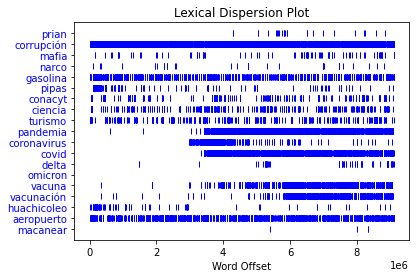

In [40]:
words = ['prian', 'corrupción', 'mafia', 'narco', 'gasolina', 'pipas', 'conacyt', 'ciencia', 'turismo', 'pandemia',
        'coronavirus', 'covid', 'delta', 'omicron', 'vacuna', 'vacunación', 'huachicoleo', 'aeropuerto', 'macanear']
ord_tokens.dispersion_plot(words)

<h3> 4. Colocaciones </h3>

<h4> 20 Bigramas </h4>

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(ord_tokens)

In [54]:
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 20)

[('franklin', 'delano'),
 ('tzindia', 'cerda'),
 ('manlio', 'fabio'),
 ('alteza', 'serenísima'),
 ('antony', 'blinken'),
 ('chivo', 'expiatorio'),
 ('palomas', 'mensajeras'),
 ('tech', 'bull'),
 ('nadia', 'sanders'),
 ('cuencas', 'lecheras'),
 ('hondonada', 'sagarpa'),
 ('phumzile', 'mlambo-ngcuka'),
 ('emiratos', 'árabes'),
 ('nado', 'sincronizado'),
 ('trending', 'topic'),
 ('ye', 'gon'),
 ('hong', 'kong'),
 ('ponciano', 'arriaga'),
 ('zhenli', 'ye'),
 ('domos', 'geodésicos')]

<h4> 30 Trigramas </h4>

In [56]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
tri_finder = TrigramCollocationFinder.from_words(ord_tokens)

In [69]:
tri_finder.apply_freq_filter(10)
tri_finder.nbest(trigram_measures.pmi, 30)

[('zhenli', 'ye', 'gon'),
 ('franklin', 'delano', 'roosevelt'),
 ('world', 'justice', 'project'),
 ('fabiola', 'alanís', 'sámano'),
 ('lourdes', 'piña', 'soria'),
 ('ria', 'money', 'transfer'),
 ('gisela', 'lara', 'saldaña'),
 ('elba', 'esther', 'gordillo'),
 ('parezco', 'disco', 'rayado'),
 ('rock', 'and', 'roll'),
 ('martin', 'luther', 'king'),
 ('candelaria', 'ochoa', 'ávalos'),
 ('wall', 'street', 'journal'),
 ('félix', 'salgado', 'macedonio'),
 ('eduardo', 'redondo', 'arámburo'),
 ('paco', 'ignacio', 'taibo'),
 ('josefina', 'vázquez', 'mota'),
 ('nadine', 'gasman', 'zylbermann'),
 ('flora', 'gasman', 'zylbermann'),
 ('elena', 'álvarez-buylla', 'roces'),
 ('tanque', 'vertical', 'atmosférico'),
 ('omar', 'fayad', 'meneses'),
 ('parezca', 'disco', 'rayado'),
 ('daniel', 'cosío', 'villegas'),
 ('the', 'mexico', 'news'),
 ('adelfo', 'regino', 'montes'),
 ('rutilio', 'escandón', 'cadenas'),
 ('eduardo', 'esquivel', 'ancona'),
 ('valentín', 'gómez', 'farías'),
 ('vicepresidente', 'pino',

<h3> 5. Histograma de Longitud de Caracteres </h3>

Primero obtenemos un objeto FreqDist con las longitudes de cada palabra. Luego obtenemos las 5 longitudes más largas e imprimimos la cantidad de palabras que tienen esta longitud. Finalmente construimos la lista de datos que le daremos al histograma para gráficar. Podemos ver que hay 8 palabras con longitudes entre 65 y 70.

(size, number of words):  [(81, 1), (69, 1), (68, 7), (54, 1), (43, 3)]


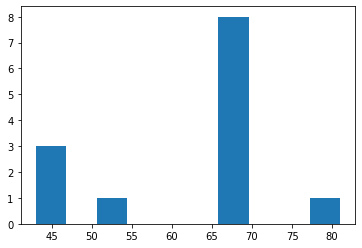

In [135]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# get lenghts of  words and their frequencies 
words = ord_tokens
chars_dist = FreqDist(len(w) for w in words)

# get 5 longest word sizes
sizes = list(chars_dist.keys())
sizes.sort(reverse=True)
sizes = sizes[:5]

print('(size, number of words): ', [(s, chars_dist[s]) for s in sizes])

# build data array to send to hist
data = []
for s in sizes:
    for _ in range(chars_dist[s]):
        data.append(s)

# plot hist
plt.hist(data)
plt.show()

<h3> 6. Palabras con longitud mayor de 8 caracteres y frecuencia mayor de 5 </h3>

In [73]:
from nltk.probability import FreqDist

# build Frequentist Distribution
freq_ord_tokens = FreqDist(ord_tokens) 

# get vocabulary through keys() and apply conditions
[word for word in freq_ord_tokens.keys() if len(word) > 8 and freq_ord_tokens[word] > 5][:50]

['estenográfica',
 'conferencia',
 'presidente',
 'boletines',
 'transcripciones',
 'documentos',
 'fotogalería',
 'coronavirus',
 'presidencia',
 'biografía',
 'acordamos',
 'presentar',
 'seguridad',
 'resultados',
 'mexicanos',
 'trabajando',
 'inseguridad',
 'violencia',
 'reuniones',
 'tendencia',
 'elementos',
 'instrumentos',
 'enfrentar',
 'legalmente',
 'corrupción',
 'contubernio',
 'autoridades',
 'delincuencia',
 'resolviendo',
 'avanzando',
 'garantizar',
 'tranquilidad',
 'publicado',
 'diciembre',
 'coordinada',
 'institución',
 'dependencia',
 'trabajaba',
 'perseverancia',
 'atendiendo',
 'importante',
 'impunidad',
 'construyendo',
 'instalaciones',
 'cuarteles',
 'inteligencia',
 'persiguiendo',
 'opositores',
 'propósito',
 'estrategia']

<h3> 7. Conditional Freq Dist Plot </h3>

Palabras que incluyen 'pobre', 'corrup', e 'inseguridad' 

<h4> Construcción del Corpus </h4>

In [79]:
from nltk.corpus import PlaintextCorpusReader

# build the corpus
corpus_root = 'conferencias_fecha/' 
conferencias = PlaintextCorpusReader(corpus_root, '.*')
conferencias.fileids()[:10]

['2016-12-17',
 '2018-12-07',
 '2018-12-10',
 '2018-12-11',
 '2018-12-12',
 '2018-12-15',
 '2018-12-17',
 '2018-12-18',
 '2018-12-19',
 '2018-12-20']

In [80]:
conferencias.words('2016-12-17')[:10]

['17',
 '.',
 '12',
 '.',
 '16',
 'Versión',
 'estenográfica',
 'de',
 'la',
 'conferencia']

<h4> Gráfica </h4>

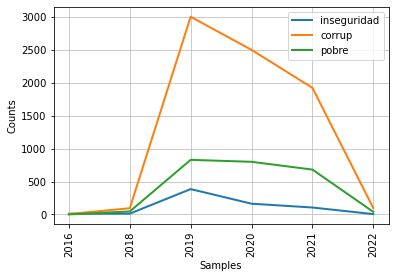

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [84]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in conferencias.fileids()
           for w in conferencias.words(fileid)
           for target in ['pobre', 'corrup', 'inseguridad']
           if w.lower().startswith(target))
cfd.plot()

<h3> 8. Cantidad de palabras con y sin stopwords </h3>

Para este ejercicio construiremos un diccionario de stopwords. Esto porque si utilizamos la forma 'naive' de resolver el problema y construimos una lista de palabras verificando la condición de que la palabra no se encuentre en la lista de stopwords esto tomará demasiado tiempo, ya que la cantidad de palabras es grande y por cada una de ellas realizará una búsqueda lineal en la lista de stopwords. 

Sin embargo, si construimos un diccionario con las stopwords, la búsqueda es mucho más rápido ya que los diccionarios en python implementan una tabla hash, que es de tiempo de acceso amortiguado constante. 

In [93]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# build dictionary of stopwords
stopwords_dict = {word:1 for word in stopwords.words('spanish')}

# count words with and without stopwords
print('Cantidad de palabras con stopwords: ', len(ord_tokens))
print('Cantidad de palabras sin stopwords: ', len([word for word in ord_tokens if stopwords_dict.get(word) == None ]))

[nltk_data] Downloading package stopwords to /home/juan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cantidad de palabras con stopwords:  9234756
Cantidad de palabras sin stopwords:  5161074


<h3> 9. 300 Palabras más frecuentes </h3>

Podemos ver que aparecen algunos símbolos de puntuación ya que estos no son considerados stopwords.

In [114]:
from nltk.probability import FreqDist
import numpy as np

# remove stopwords
stopwords_dict = {word:1 for word in stopwords.words('spanish')}
words_no_sw = [word for word in ord_tokens if stopwords_dict.get(word) == None ]

# build Frequentist Distribution
freqDist = FreqDist(words_no_sw) 

# get words and their frequencies 
words = list(freqDist.keys())
freqs = np.array(list(freqDist.values()))

# get index of most frequent words in descending order
args = np.argsort(freqs)[::-1]

# get most frequent words
words_by_freq = [words[i] for i in args[:300]]
words_by_freq

[',',
 '.',
 ':',
 'presidente',
 '¿',
 '?',
 'si',
 'lópez',
 'manuel',
 'obrador',
 'andrés',
 'entonces',
 'va',
 'vamos',
 'méxico',
 ';',
 'mil',
 'gobierno',
 '-',
 'aquí',
 'dos',
 'ahora',
 'nacional',
 'ver',
 'pregunta',
 'caso',
 'país',
 'días',
 'millones',
 'van',
 'ahí',
 'usted',
 'cómo',
 'pues',
 'ser',
 'hacer',
 'bueno',
 'señor',
 'gracias',
 'así',
 'gente',
 'pesos',
 '‘',
 'salud',
 'tema',
 'ciento',
 '’',
 'pueblo',
 'decir',
 'bien',
 '…',
 'año',
 'importante',
 'tener',
 'manera',
 'hoy',
 'puede',
 'día',
 'información',
 'parte',
 'tres',
 'mismo',
 'años',
 'prensa',
 'interlocutor',
 'personas',
 'buenos',
 'seguridad',
 'hace',
 'tiempo',
 'general',
 'interlocutora',
 'corrupción',
 'todas',
 'unidos',
 'secretaría',
 'luego',
 'poder',
 'ayer',
 'muchas',
 'acuerdo',
 'sólo',
 'voy',
 'haciendo',
 'programa',
 'ustedes',
 'además',
 'federal',
 'ciudad',
 '19',
 'conferencia',
 'trabajo',
 'pública',
 'empresas',
 'covid',
 'semana',
 'ejemplo',
 'ca

# 4. Otras librerías de Python

<h3> 1. Librerías con Ventajas y Desventajas </h3>

1. Spacy
    * Ventaja: Es más rápida debido a que se encuentra construida con Cython, que es un conjunto de instrucciones en python que utiliza funciones core de C, y por lo tanto es más rápido.
    * Desventaja: Debido a que está basado en C, el funcionamiento de a bajo nivel de la librería es más difícil o imposible de descifrar.

2. TextBlob
    * Ventaja: Provee traducción y detección de lenguajes utilizando el motor de Google Translate
    * Desventaja: No provee características como vectores de palabras y es más lento que Spacy.



<h3> 2. Librerías para otros lenguajes </h3>

1. OpenNLP (Java)
    * Ventaja: curva de aprendizaje reducida con buena documentación y muchos ejemplos en línea.
    * Desventaja: carece de funciones avanzadas en comparación con CoreNLP.
2. Stanford CoreNLP (Java)
    * Ventaja: Provee funciones avanzadas. Además, por el paradigma de objetos es fácil de entender y manipular.  
    * Desventaja: Requiere de más líneas de código para hacer un prototipo rápido